In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [101]:
df= pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [102]:
df.shape

(10000, 14)

In [103]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [105]:
df.duplicated().sum()

0

In [106]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [107]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [108]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [109]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [110]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [111]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [113]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [115]:
X_train.shape

(8000, 11)

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler=StandardScaler()

In [118]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test) 

In [119]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [120]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [136]:
history=model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3181
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3185
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3187
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3181
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3178
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3183
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3182
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3186
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3185
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3185
Epoch 11/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3187
Epoch 12/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3184
Epoch 13/100


In [124]:
model.layers[0].get_weights()

[array([[ 0.16643672, -0.24253343,  0.28095314, -0.00476012,  0.18571141,
          0.06290372, -0.1761246 ,  0.03023412,  0.10252122,  0.055953  ,
         -0.2961624 ],
        [-0.9242336 ,  0.13076434,  0.54058015, -0.6245397 , -0.3042264 ,
         -0.8704035 ,  0.13720462,  0.2059391 ,  0.59338766, -0.22199084,
         -0.8586041 ],
        [ 0.13538492, -0.00764405, -0.4959974 ,  0.17204443, -0.08824513,
         -0.0780575 , -0.07596796,  0.22385424,  0.03842881, -0.0637306 ,
          0.10796139],
        [ 0.2083416 ,  0.07345361, -0.23501433,  0.19829266,  0.9097147 ,
         -0.03684464,  0.7039964 ,  0.1780534 ,  0.15346749, -0.16148674,
          0.14480022],
        [ 0.08523787,  1.031551  ,  0.22703631, -0.00995332,  1.1418729 ,
          0.00215375, -0.04445971,  0.65903074, -0.11027515, -1.2064995 ,
          0.18660542],
        [ 1.0981907 , -0.12605599, -0.45415816, -0.11093789,  0.05097078,
         -0.14198413,  0.20493588,  0.04819157, -0.20188907, -0.1077701

In [125]:
y_log=model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [126]:
y_pred=np.where(y_log>.5,1,0)

In [127]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy_score(y_test,y_pred)

0.8625

In [133]:
import matplotlib.pyplot as plt

In [138]:
history.history

{'loss': [0.3181487023830414,
  0.3185027837753296,
  0.3186517655849457,
  0.31807979941368103,
  0.3178480565547943,
  0.3182835578918457,
  0.3181889057159424,
  0.31861865520477295,
  0.31850019097328186,
  0.3185134530067444,
  0.3186866044998169,
  0.3184039890766144,
  0.31821227073669434,
  0.3189087510108948,
  0.31805697083473206,
  0.3187026381492615,
  0.3181111514568329,
  0.31896066665649414,
  0.3179844915866852,
  0.3185385763645172,
  0.3180544674396515,
  0.3178854286670685,
  0.3187236487865448,
  0.3182438910007477,
  0.31840088963508606,
  0.3180692493915558,
  0.3179396092891693,
  0.317844033241272,
  0.31736767292022705,
  0.3177869915962219,
  0.31795787811279297,
  0.31807148456573486,
  0.31815335154533386,
  0.31710678339004517,
  0.3177274465560913,
  0.31776538491249084,
  0.31804654002189636,
  0.31767234206199646,
  0.31769460439682007,
  0.31784412264823914,
  0.3177207112312317,
  0.3181939125061035,
  0.3175297677516937,
  0.31777992844581604,
  0.317

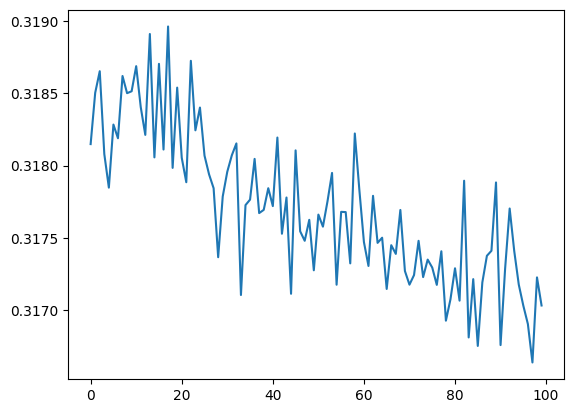

In [139]:
plt.plot(history.history['loss'])